In [1]:
from utils import * 

import os
os.chdir("../../scVI/")
os.getcwd()

import pickle
import numpy as np
import pandas as pd

import torch

from umap import UMAP

In [26]:
with open('../CSF/signatures/allsigs.txt') as f:
    geneset = f.readlines()

setname=[]
setorig=[]
genes = []
for x in geneset:
    x = x.rstrip()
    line = x.split('\t')
    if len(line)>1:
        setname.append(line[0])
        setorig.append(line[1])
        genes.append(line[2:])
    

In [27]:
names,occ=np.unique(setname,return_counts=True)

In [28]:
with open('../CSF/Notebooks/' + 'dataset/all_datasets.pkl', 'rb') as f:
    gene_dataset = pickle.load(f)

scaling_factor = gene_dataset.X.mean(axis=1)
norm_X = gene_dataset.X/scaling_factor.reshape(len(scaling_factor), 1)

In [31]:
def matchedlist(norm_X, genelist, genenames,ngenes):
    mean_exprs = np.asarray(norm_X[:,:].mean(axis=0)).ravel()
    plt.hist(np.log10(1+mean_exprs))
    matched=[]
    for x in genelist:
        if x in genenames:
            exprs = np.mean(norm_X[:,genenames==x])
            plt.axvline(np.log10(1+exprs),color='r')
            diff = np.abs(mean_exprs - exprs)
            idx = np.argsort(np.argsort(diff))
            idx = np.where(idx<=ngenes)[0]
            res = genenames[idx]
            res = res[res!=x]
            matched.append(res)
            exprs = np.mean(norm_X[:,idx])
            plt.axvline(np.log10(1+exprs),color='b')
    return matched


# print same length gene list for all signatures

In [29]:
from random import sample

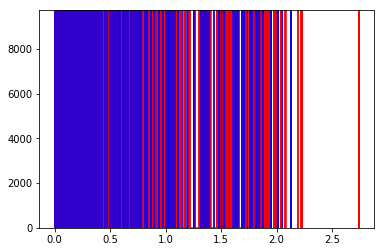

In [32]:
control = []
for x in genes:
    res = []
    matched = matchedlist(norm_X,x,gene_dataset.gene_names,20)
    for rep in range(100):
        res.append(np.asarray([sample(list(x),1) for x in matched]).ravel())
    control.append(res)

In [34]:
with open('../CSF/signatures/randomsigs.rep100.txt','a') as f:
    for i,x in enumerate(control):
        for j,y in enumerate(x):
            f.write('set%irep%i\trep%i\t'%(i,j,j)+'\t'.join(y) + '\n')


# sample expression matched signatures for TFH

In [83]:
[', '.join(genes[i]) for i,x in enumerate(setname) if x.startswith('TFH')]

['ASCL2, BCL6, CXCR5, PDCD1, ICOS, IL21, IL21R, CCR6, CXCR3',
 'BCL6, CXCR5, PDCD1, ICOS, IL21R, CD40LG, SH2D1A, TIGIT, ASCL2',
 'BCL6, CXCR5, PDCD1, ICOS, IL21, IL21R, CD40LG, SH2D1A, TIGIT, ASCL2, MAF, STAT3, BATF, IRF4, BTLA']

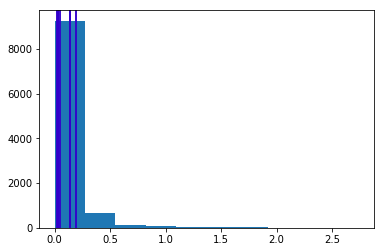

In [84]:
matched = matchedlist(norm_X,['BCL6', 'CXCR5', 'PDCD1', 'ICOS', 'IL21R', 'CD40LG', 'SH2D1A', 'TIGIT', 'ASCL2'],
           gene_dataset.gene_names,20)

In [85]:
control = []
for i in range(1000):
    control.append(np.asarray([sample(list(x),1) for x in matched]).ravel())

In [86]:
with open('../CSF/signatures/TFH.matched.txt','a') as f:
    for i,x in enumerate(control):
        f.write('random%i\trandom%i\t'%(i,i)+'\t'.join(list(x)) + '\n')


# sample expression matched signatures for TH1

In [10]:
for i,x in enumerate(setname):
    if x.startswith('Th1'):
        print(x)
        print(', '.join(genes[i]))

Th17
AHR, BATF, CCR6, CXCR3, EGR1, EGR2, ETV6, GPR65, HIF1A, IL17A, IL17F, IL1R1, IL1RN, IL21, IL22, IL23R, IL6R, IL6ST, IRF4, MAF, PML, POU2AF1, PROCR, RBPJ, RORA, RORC, RUNX1, RUNX3, SGK1, SOCS3, STAT3, TSC22D3
Th17
IL22, IL17F, IL17A, STAT3, CCR6, CSF2, BATF, IL23R, IL1R1, MINA, IL21, RORC, SMARCA4, IL12RB1, CCL20, SOCS3
Th1
CXCR3, ZBTB32, IL18RAP, CCR5, IL18R1, IFNG, IL12RB2, IL27RA, STAT1, STAT4, TBX21


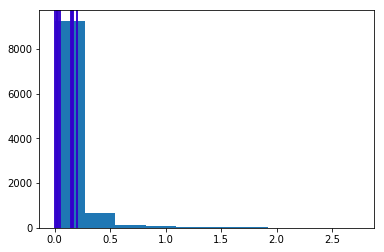

In [11]:
matched = matchedlist(norm_X,
                      ['CXCR3', 'ZBTB32', 'IL18RAP', 'CCR5', 'IL18R1', 'IFNG', 'IL12RB2', 'IL27RA', 'STAT1', 'STAT4', 'TBX21'],
                      gene_dataset.gene_names,20)


In [12]:
control = []
for i in range(1000):
    control.append(np.asarray([sample(list(x),1) for x in matched]).ravel())

In [13]:
with open('../CSF/signatures/Th1.matched.txt','a') as f:
    for i,x in enumerate(control):
        f.write('random%i\trandom%i\t'%(i,i)+'\t'.join(list(x)) + '\n')
